In [3]:
!pip install librosa
!pip install matplotlib

     ---------------------------------------- 0.0/253.7 kB ? eta -:--:--
     --------------------- ---------------- 143.4/253.7 kB 4.2 MB/s eta 0:00:01
     -------------------------------------- 253.7/253.7 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------- ----- 0.9/1.0 MB 27.4 MB/s eta 0:00:01
     ---------------------------------------- 1.0/1.0 MB 21.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
     ---- ----------------------------------- 1.0/9.3 MB 31.7 MB/s eta 0:00:01
     --------- ------------------------------ 2.2/9.3 MB 27.7 MB/s eta 0:00:01
     -------------- ------------------------- 3.5/9.3 MB 27.6 MB/s eta 0:00:01
     -------------------- ------------------- 4.8/9.3 MB 27.6 MB/s eta 0:00:01
     -------------------------- ------------- 6.2/9.3 MB 28.3 MB/s eta 0:00:01
     -------------------------------- ------- 7.7/9.3 MB 28.8 MB/s eta 0

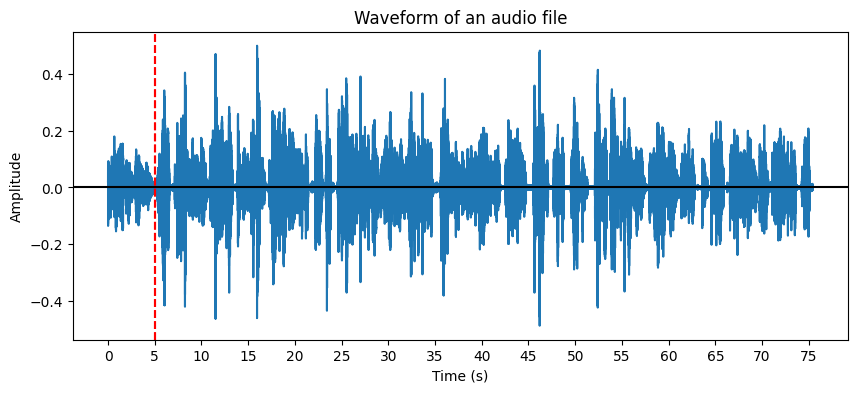

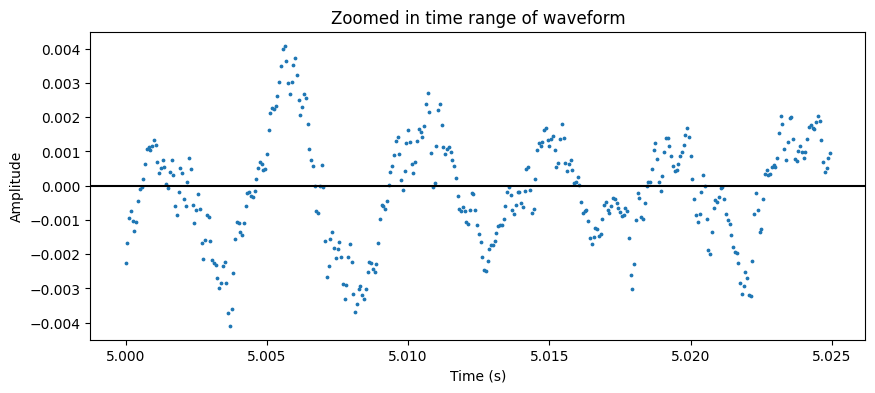

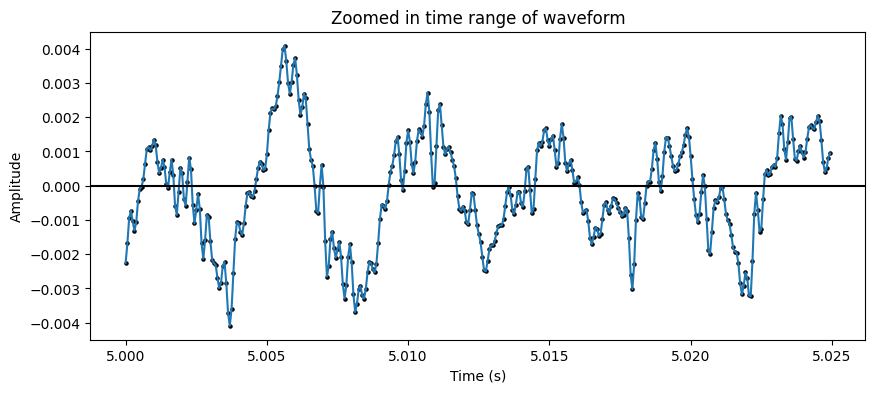

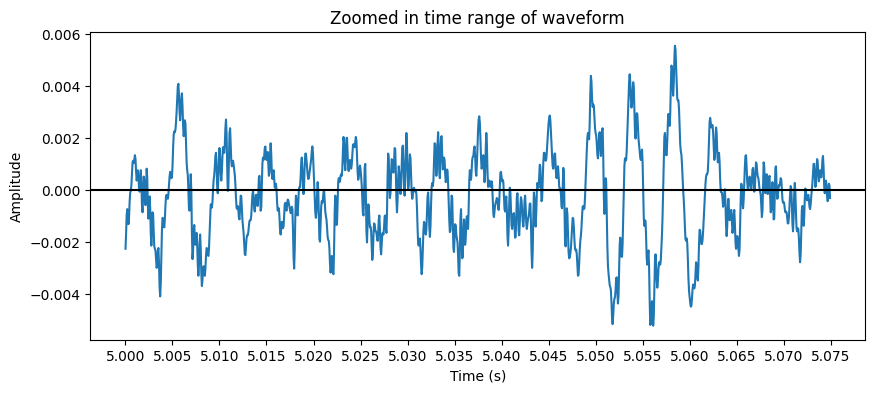

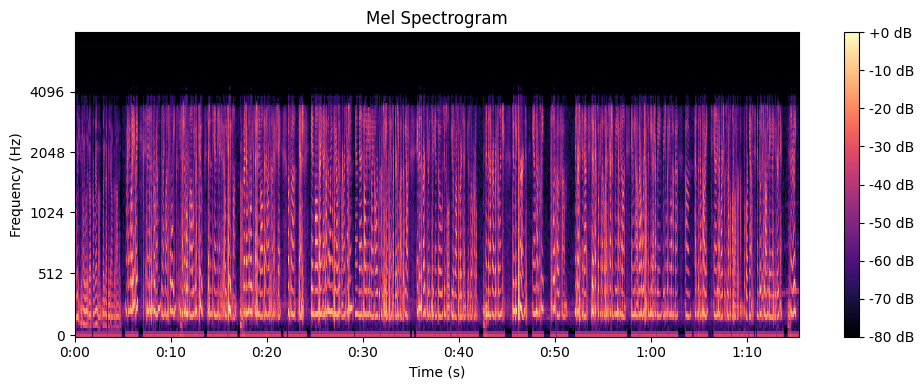

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Path to the audio file
audio_file = r'C:\Users\janbe\Desktop\Test_diar_1m.wav'

# Read audio
samples, sample_rate = librosa.load(audio_file, sr=None, mono=True)

# Create timeline based on the number of samples and the sampling rate
duration = len(samples) / sample_rate
time = np.linspace(0., duration, len(samples))

# Visualize waveform as line plot
plt.figure(figsize=(10, 4))
plt.plot(time, samples)
plt.axhline(0, color='black', linestyle='-')  # Horizontal reference line at Y = 0
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of an audio file')

# Insert gradations and lines
plt.xticks(np.arange(0, duration, 5))
plt.axvline(x=5, color='red', linestyle='dashed')
plt.axvline(x=5.025, color='red', linestyle='dashed')

plt.show()

# Visualize waveform as dot plot
# Set time range for zoom
zoom_start = 5  # Zoom start time (in seconds)
zoom_end = 5.025  # End time of the zoom (in seconds)

# Determine indices for the time domain
zoom_start_idx = int(zoom_start * sample_rate)
zoom_end_idx = int(zoom_end * sample_rate)

# Visualize waveform dot plot in zoom area
plt.figure(figsize=(10, 4))
plt.scatter(time[zoom_start_idx:zoom_end_idx], samples[zoom_start_idx:zoom_end_idx], s=3)
plt.axhline(0, color='black', linestyle='-')  # Horizontal reference line at Y = 0
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Zoomed in time range of waveform')
plt.show()

# Visualize waveform as line and dot plot
# Set time range for zoom
zoom_start = 5  # Zoom start time (in seconds)
zoom_end = 5.025  # End time of the zoom (in seconds)

# Determine indices for the time domain
zoom_start_idx = int(zoom_start * sample_rate)
zoom_end_idx = int(zoom_end * sample_rate)

# Visualize waveform dot plot in zoom area
plt.figure(figsize=(10, 4))
plt.plot(time[zoom_start_idx:zoom_end_idx], samples[zoom_start_idx:zoom_end_idx], label='Linie')
plt.scatter(time[zoom_start_idx:zoom_end_idx], samples[zoom_start_idx:zoom_end_idx], s=5, label='Points', color="black")
plt.axhline(0, color='black', linestyle='-')  # Horizontal reference line at Y = 0
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Zoomed in time range of waveform')
plt.show()

# Visualize waveform as line plot with zoom
# Set time range for zoom
zoom_start = 5  # Zoom start time (in seconds)
zoom_end = 5.075  # End time of the zoom (in seconds)

# Determine indices for the time domain
zoom_start_idx = int(zoom_start * sample_rate)
zoom_end_idx = int(zoom_end * sample_rate)

# Visualize waveform dot plot in zoom area
plt.figure(figsize=(10, 4))
plt.plot(time[zoom_start_idx:zoom_end_idx], samples[zoom_start_idx:zoom_end_idx])
plt.axhline(0, color='black', linestyle='-')  # Horizontal reference line at Y = 0
plt.xticks(np.arange(zoom_start, zoom_end, 0.005))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Zoomed in time range of waveform')
plt.show()

# Calculate Mel spectrogram
mel_spec = librosa.feature.melspectrogram(y=samples, sr=sample_rate)

# Apply log scale
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Generate time axis and frequency axis
time = np.linspace(0., len(samples) / sample_rate, num=mel_spec.shape[1])
freq = librosa.mel_frequencies(n_mels=mel_spec.shape[0], fmin=0, fmax=sample_rate/2)

# Plot Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sample_rate, fmin=0, fmax=sample_rate/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()